# 1

### Importing all the necessary Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import preprocessing

### Loading Fraud Check Dataset

In [2]:
fd = pd.read_csv("E:\\ExcelR\\Assingment\\Assignment 12\\Fraud_check.csv")
fd

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### Applying Label Encoder for object type variables

In [3]:
le = preprocessing.LabelEncoder()

In [4]:
fd["Urban"] = le.fit_transform(fd["Urban"])
fd["Marital.Status"] = le.fit_transform(fd["Marital.Status"])
fd["Undergrad"] = le.fit_transform(fd["Undergrad"])

In [5]:
fd.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


### Bagged Decision Trees for Classification

In [6]:
array = fd.values
x = array[:,0:5]
y = array[:,5]


In [10]:
KFold = KFold(n_splits = 10, random_state = 6, shuffle = False)

cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = 6)

results = cross_val_score(model, x, y, cv = KFold)

In [11]:
print(results.mean())

0.5599999999999999


### Random Forest Classification

In [12]:
x1 = array[:,0:5]
y1 = array[:,5]

num_trees1 = 100
max_features = 3

In [15]:
kfold1 = KFold(n_splits = 10, random_state = 6, shuffle = False)
model1 = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [16]:
results1 = cross_val_score(model, x1, y1, cv = kfold1)
print(results.mean())

0.5599999999999999


### AdaBoost Classification

In [17]:
x2 = array[:,0:5]
y2 = array[:,5]

num_trees2 = 100

In [18]:
kfold2 = KFold(n_splits = 10, random_state = 6, shuffle = False)
model2 = AdaBoostClassifier(n_estimators = num_trees2, random_state = 6)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [19]:
results2 = cross_val_score(model2 , x2, y2, cv = kfold2)
print(results2.mean())

0.54


### Stacking Ensemble for Classification

In [20]:
x3 = array[:,0:5]
y3 = array[:,5]


In [21]:
kfold3 = KFold(n_splits = 3, random_state = 6, shuffle = False)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [22]:
estimators = []

mdl1 = LogisticRegression(max_iter = 500)
estimators.append(('logistic', mdl1))

mdl2 = DecisionTreeClassifier()
estimators.append(('cart', mdl2))

mdl3 = SVC()
estimators.append(('svm', mdl3))

In [23]:
ensemble = VotingClassifier(estimators)

In [24]:
results3 = cross_val_score(ensemble, x3, y3, cv = kfold3) 
print(results3.mean())

0.5033333333333333


### Visualization

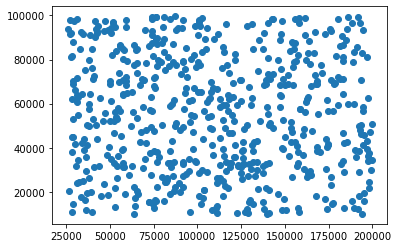

In [84]:
plt.scatter(fd["City.Population"], fd["Taxable.Income"])
plt.show()

# 2

### Loading Company Data

In [25]:
cd = pd.read_csv("E:\\ExcelR\\Assingment\\Assignment 12\\Company_Data.csv")
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Applying label encoder

In [27]:
cd["ShelveLoc"] = le.fit_transform(cd["ShelveLoc"])
cd["Urban"] = le.fit_transform(cd["Urban"])
cd["US"] = le.fit_transform(cd["US"])

In [28]:
cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [46]:
X = array[:,0:5]
Y = array[:,5]

### Using KFold

In [48]:
kfold = KFold(n_splits = 10, random_state = 8, shuffle = False)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


### Bagged Decision Trees for Classification

In [49]:
cart = DecisionTreeClassifier()
model1 = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = 8)
results = cross_val_score(model1, X, Y, cv = kfold)
print(results.mean())

0.555


### Random Forest Classification

In [51]:
model2 = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
results = cross_val_score(model2, X, Y, cv = kfold)
print(results.mean())

0.56


### AdaBoost Classification

In [53]:
model3 = AdaBoostClassifier(n_estimators = num_trees, random_state = 10)
results = cross_val_score(model3, X, Y, cv = kfold)
print(results.mean())

0.54


### Stacking Ensemble for Classification

In [55]:
estimators1 = []

md1 = LogisticRegression(max_iter = 500)
estimators1.append(('logistic', md1))

md2 = DecisionTreeClassifier()
estimators1.append(('cart',md2))

md3 = SVC()
estimators1.append(('svm', md3))

ensemble = VotingClassifier(estimators)

results = cross_val_score(ensemble, X, Y, cv = kfold)
print(results.mean())

0.5083333333333333


### Visualization 

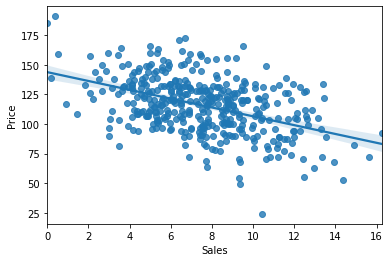

In [59]:
sns.regplot(cd["Sales"], cd["Price"])
plt.show()